In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
import math

In [2]:
TRAIN_DATA_DIR = './cats_and_dogs_small/train'
VALIDATION_DATA_DIR = './cats_and_dogs_small/validation'
TEST_DATA_DIR = './cats_and_dogs_small/test'

TRAIN_SAMPLES = 800*2
VALIDATION_SAMPLES = 400*2
NUM_CLASSES = 2
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 64

In [3]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   vertical_flip=True)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [4]:
train_generator = train_datagen.flow_from_directory(TRAIN_DATA_DIR,
                                                    target_size=(IMG_WIDTH,
                                                                 IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    shuffle=True,
                                                    seed=12345,
                                                    class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical')

Found 1600 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [5]:
def model_maker():
    base_model = MobileNet(include_top=False,
                           input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

    for layer in base_model.layers[:-2]:
        layer.trainable = False # Top 층을 제외한 나머지 층에서 2개의 층을 새롭게 학습 

    input1 = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    custom_model = base_model(input1)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(64, activation='relu')(custom_model)
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)
    return Model(inputs=input1, outputs=predictions)

In [6]:
model = model_maker()

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['acc'])
history=model.fit(
    train_generator,
    steps_per_epoch=TRAIN_SAMPLES // BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=VALIDATION_SAMPLES // BATCH_SIZE)

Epoch 1/10
25/25 [==============================] - 72s 3s/step - loss: 0.3697 - acc: 0.8350 - val_loss: 0.0963 - val_acc: 0.9596
Epoch 2/10
25/25 [==============================] - 58s 2s/step - loss: 0.2066 - acc: 0.9225 - val_loss: 0.0588 - val_acc: 0.9779
Epoch 3/10
25/25 [==============================] - 62s 2s/step - loss: 0.1894 - acc: 0.9244 - val_loss: 0.0524 - val_acc: 0.9818
Epoch 4/10
25/25 [==============================] - 58s 2s/step - loss: 0.1384 - acc: 0.9450 - val_loss: 0.0555 - val_acc: 0.9831
Epoch 5/10
25/25 [==============================] - 57s 2s/step - loss: 0.1462 - acc: 0.9438 - val_loss: 0.0694 - val_acc: 0.9714
Epoch 6/10
25/25 [==============================] - 60s 2s/step - loss: 0.1274 - acc: 0.9475 - val_loss: 0.0566 - val_acc: 0.9792
Epoch 7/10
25/25 [==============================] - 58s 2s/step - loss: 0.1474 - acc: 0.9388 - val_loss: 0.0798 - val_acc: 0.9701
Epoch 8/10
25/25 [==============================] - 60s 2s/step - loss: 0.1499 - acc: 0.93

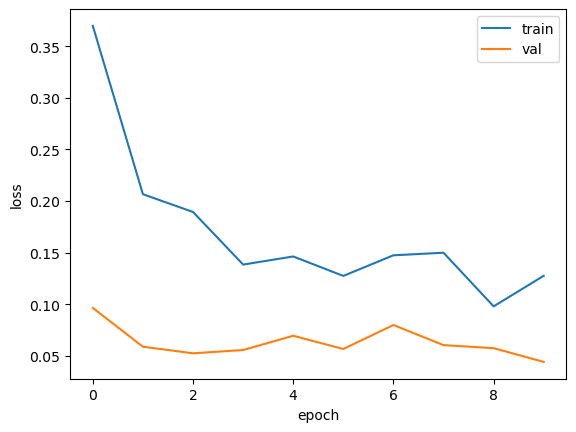

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [10]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [11]:
test_generator = val_datagen.flow_from_directory(
    TEST_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical')

Found 800 images belonging to 2 classes.


In [13]:
model.evaluate(test_generator, steps=math.ceil(float(800 / BATCH_SIZE)),verbose=1)

13/13 [==============================] - 10s 720ms/step - loss: 0.0815 - acc: 0.9712


[0.08151722699403763, 0.9712499976158142]

In [15]:
import numpy as np
np.set_printoptions(suppress=True)

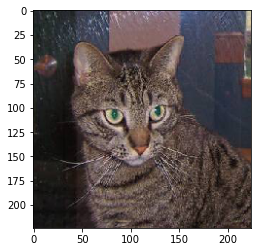

In [19]:
img_path = 'cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
plt.imshow(img_array/255)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255


In [21]:
prediction = model.predict(preprocessed_img)
print(np.array(prediction[0]))

[0.9999609  0.00003912]
